In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def create_poly_features(x, degree=2):
    X_poly = np.zeros((x.shape[0],degree))
    
    for i in range(0,degree):
            X_poly[:,i] = x**(i+1)
            
    return X_poly

def generate_data(N,degree=2):
    X = np.random.rand(N)*2
    Y =  1 + 1*X + 20*X**2 + 8*np.random.randn(N)

    X_poly = create_poly_features(X,degree)
    return X, X_poly, Y

In [3]:
X_train, X_poly_train, Y_train = generate_data(50)
X_test, X_poly_test, Y_test = generate_data(20)

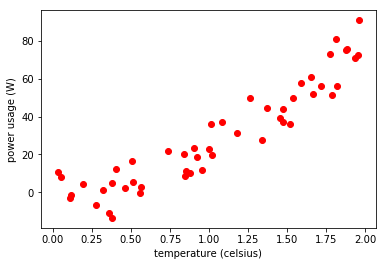

In [4]:
plt.figure()
plt.scatter(X_train,Y_train,color='r',label='training data')
plt.xlabel('temperature (celsius)')
plt.ylabel('power usage (W)')
plt.show()

In [5]:
mu = np.mean(X_poly_train,axis=0,keepdims=True)
std = np.std(X_poly_test,axis=0,keepdims=True)

X_poly_train = (X_poly_train - mu)/std

X_poly_test = (X_poly_test-mu)/std

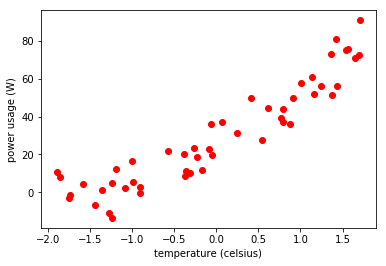

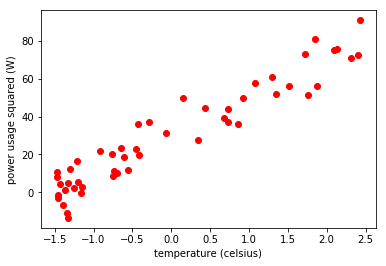

In [6]:
plt.figure()
plt.scatter(X_poly_train[:,0],Y_train,color='r',label='training data')
plt.xlabel('temperature (celsius)')
plt.ylabel('power usage (W)')
plt.show()

plt.figure()
plt.scatter(X_poly_train[:,1],Y_train,color='r',label='training data')
plt.xlabel('temperature (celsius)')
plt.ylabel('power usage squared (W)')
plt.show()

In [7]:
def MSE(Y,Yhat):
    return np.mean((Y-Yhat)**2)

def poly(x,theta,b):
    return np.sum(theta*x,axis=1)+b

def gradient(x,y,theta,b):
    yhat = poly(x,theta,b)
    dtheta = -2*np.mean((y-yhat)[:,np.newaxis]*x,axis=0)
    db = -2*np.mean(y-yhat)
    
    return dtheta,db

In [8]:
learning_rate = 1e-3
N_iterations = 3000
Theta = np.asarray([1.0,1.0])
b = 1.0
print_every = 100
train_loss = []
test_loss = []
iters = []
thetas = []

In [9]:
for i in range(N_iterations):
        dtheta,db = gradient(X_poly_train,Y_train,Theta,b)
        Theta[0] = Theta[0]-learning_rate*dtheta[0]
        Theta[1] = Theta[1]-learning_rate*dtheta[1]
        b = b-learning_rate*db
        
        if (i+1)%print_every == 0:
            Yhat = poly(X_poly_train,Theta,b)
            e = MSE(Y_train,Yhat)
            train_loss.append(e)
            
            Yhat_test = poly(X_poly_test,Theta,b)
            e_test = MSE(Y_test,Yhat_test)
            test_loss.append(e_test)
            
            iters.append(i)
            thetas.append(Theta.copy())
            print "Iteration {}: Theta={}, b={}, MSE_train = {}, MSE_test = {}".format(i,Theta,b,e,e_test)

Iteration 99: Theta=[ 4.87429257  5.63544725], b=6.2929512785, MSE_train = 815.996100648, MSE_test = 576.438506555
Iteration 199: Theta=[ 7.02561235  8.27455695], b=10.6255854939, MSE_train = 509.09092209, MSE_test = 418.137233289
Iteration 299: Theta=[ 8.2063928   9.78862615], b=14.1721360395, MSE_train = 345.255692507, MSE_test = 317.240019959
Iteration 399: Theta=[  8.84058427  10.66858175], b=17.0752245873, MSE_train = 248.730420799, MSE_test = 246.300293473
Iteration 499: Theta=[  9.16705603  11.19103422], b=19.4515965036, MSE_train = 188.241575916, MSE_test = 195.048561251
Iteration 599: Theta=[  9.32039498  11.51183921], b=21.3968156698, MSE_train = 149.02156126, MSE_test = 158.00911807
Iteration 699: Theta=[  9.37643096  11.71881404], b=22.9891075072, MSE_train = 123.139575688, MSE_test = 131.399761739
Iteration 799: Theta=[  9.37788769  11.86144036], b=24.2925047486, MSE_train = 105.905152192, MSE_test = 112.379378374
Iteration 899: Theta=[  9.34883551  11.96759992], b=25.3594

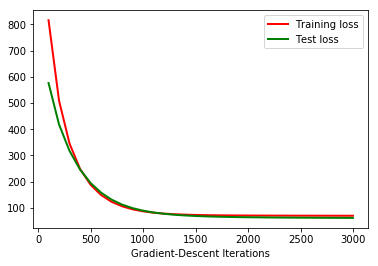

In [10]:
plt.plot(iters,train_loss,linewidth=2,color='r',label='Training loss')
plt.plot(iters,test_loss, linewidth=2, color='g', label='Test loss')
plt.xlabel('Gradient-Descent Iterations')
plt.legend()
plt.show()

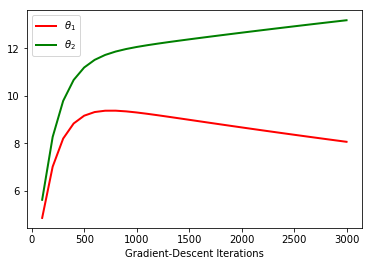

In [11]:
thetas = np.asarray(thetas)

plt.plot(iters,thetas[:,0],linewidth=2,color='r',label=r'$\theta_1$')
plt.plot(iters,thetas[:,1],linewidth=2,color='g',label=r'$\theta_2$')
plt.xlabel('Gradient-Descent Iterations')
plt.legend()
plt.show()

In [12]:
X = np.arange(0.0,2.0,0.1)
X = create_poly_features(X,2)
X = (X-mu)/std
Yhat = poly(X,Theta,b)
X = X*std+mu
print Yhat.shape
print X.shape

(20,)
(20, 2)


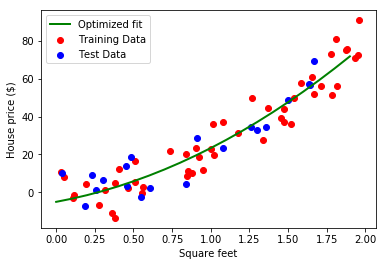

In [13]:
plt.figure()
plt.scatter(X_train,Y_train, color='r', label='Training Data')
plt.scatter(X_test,Y_test, color='b', label='Test Data')
plt.plot(X[:,0],Yhat, color='g', linewidth=2, label=r'Optimized fit')
plt.xlabel('Square feet')
plt.ylabel('House price ($)')
plt.legend(loc='upper left')
plt.show()